<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [102]:
## Import Libraries

import itertools
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve, roc_curve, auc

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

In [3]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

# Step 3: Read the Data
- Read the data (breast-cancer-wisconsin-data-old.csv)
- Perform some basic structural cleaning to facilitate the work

In [64]:
columns = [
    'Sample_Number',
    'Clump_Thickness',
    'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape',
    'Marginal_Adhesion',
    'Single_Epithelial_Cell_Size',
    'Bare_Nuclei',
    'Bland_Chromatin',
    'Normal_Nucleoli',
    'Mitoses',
    'Class'
]
breast_cancer = pd.read_csv(
    filepath_or_buffer = 'dat/breast-cancer-wisconsin-data-old.csv',
    header = None,
    names = columns,
    usecols = columns[1:], # do not use the first column
    na_values = '?' # convert the '?' to NA
)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [65]:
breast_cancer.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [68]:
breast_cancer.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [69]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              699 non-null    int64  
 1   Uniformity_of_Cell_Size      699 non-null    int64  
 2   Uniformity_of_Cell_Shape     699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [70]:
breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [72]:
# Domains, Intervals
print('- Domains, Intervals')
for c in breast_cancer.columns:
    x = breast_cancer[c].unique()
    x.sort()
    print('+ %-27s: (%-s)' % (c, breast_cancer[c].dtypes.name))

    if breast_cancer[c].dtypes.name != 'object':
        print('  min: %d, max: %d' % (breast_cancer[c].min(), breast_cancer[c].max()))
    print('  values: %s' % x)

- Domains, Intervals
+ Clump_Thickness            : (int64)
  min: 1, max: 10
  values: [ 1  2  3  4  5  6  7  8  9 10]
+ Uniformity_of_Cell_Size    : (int64)
  min: 1, max: 10
  values: [ 1  2  3  4  5  6  7  8  9 10]
+ Uniformity_of_Cell_Shape   : (int64)
  min: 1, max: 10
  values: [ 1  2  3  4  5  6  7  8  9 10]
+ Marginal_Adhesion          : (int64)
  min: 1, max: 10
  values: [ 1  2  3  4  5  6  7  8  9 10]
+ Single_Epithelial_Cell_Size: (int64)
  min: 1, max: 10
  values: [ 1  2  3  4  5  6  7  8  9 10]
+ Bare_Nuclei                : (float64)
  min: 1, max: 10
  values: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
+ Bland_Chromatin            : (int64)
  min: 1, max: 10
  values: [ 1  2  3  4  5  6  7  8  9 10]
+ Normal_Nucleoli            : (int64)
  min: 1, max: 10
  values: [ 1  2  3  4  5  6  7  8  9 10]
+ Mitoses                    : (int64)
  min: 1, max: 10
  values: [ 1  2  3  4  5  6  7  8 10]
+ Class                      : (int64)
  min: 2, max: 4
  values: [2 4]


In [73]:
print(breast_cancer['Bare_Nuclei'].value_counts(dropna = False))

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
NaN      16
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [78]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute
values = breast_cancer.values

# define the criteria for dealing with the missing values
imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'median'
)
# Now impute it
imputedData = imputer.fit_transform(values)

In [79]:
scaler = MinMaxScaler(feature_range = (0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [80]:
# move the data back to a dataframe
df_n = pd.DataFrame.from_records(normalizedData, columns = columns[1:])
df_n['Class'] = df_n['Class'].astype(np.int8)
df_n.sample(5).T

,435,221,671,150,391
Clump_Thickness,1.000000,1.000000,0.222222,0.000000,1.000000
Uniformity_of_Cell_Size,0.777778,0.555556,0.111111,0.000000,0.777778
Uniformity_of_Cell_Shape,1.000000,0.333333,0.000000,0.000000,0.666667
Marginal_Adhesion,0.000000,0.222222,0.111111,0.000000,0.333333
Single_Epithelial_Cell_Size,0.222222,1.000000,0.111111,0.000000,0.222222
Bare_Nuclei,1.000000,1.000000,0.000000,0.000000,1.000000
Bland_Chromatin,0.444444,0.888889,0.222222,0.222222,0.666667
Normal_Nucleoli,0.000000,1.000000,0.000000,0.000000,0.888889
Mitoses,0.000000,0.000000,0.000000,0.000000,0.000000
Class,1.000000,1.000000,0.000000,0.000000,1.000000


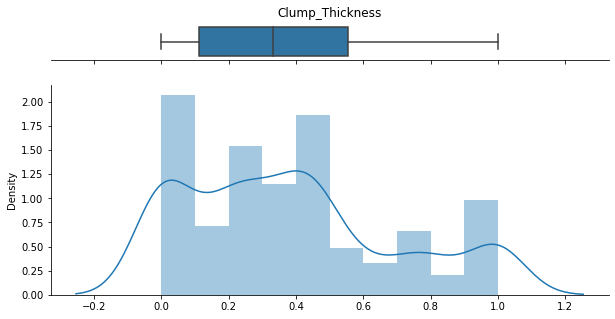

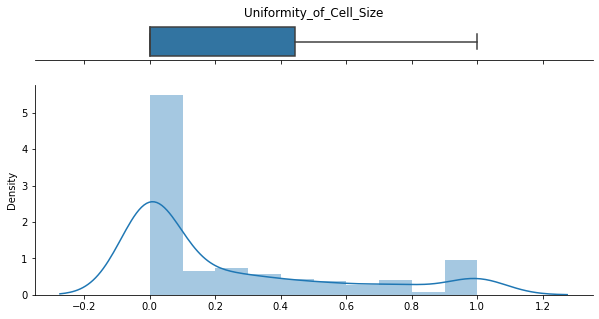

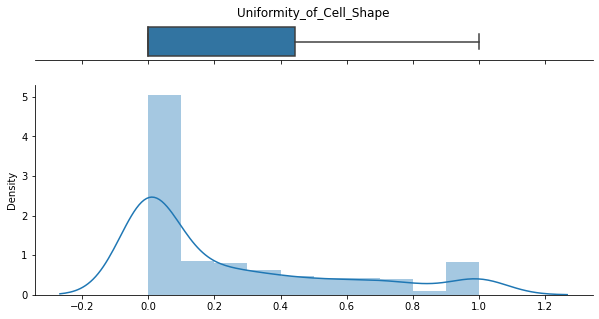

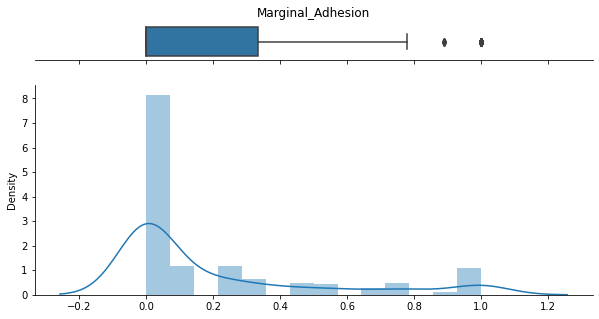

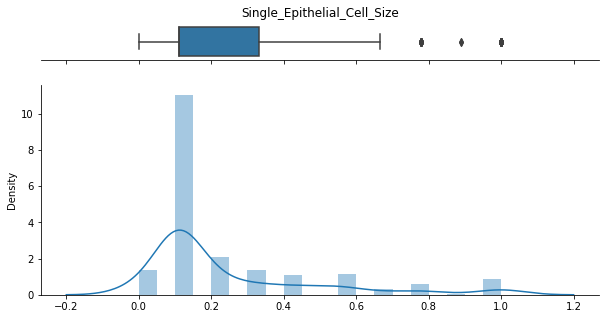

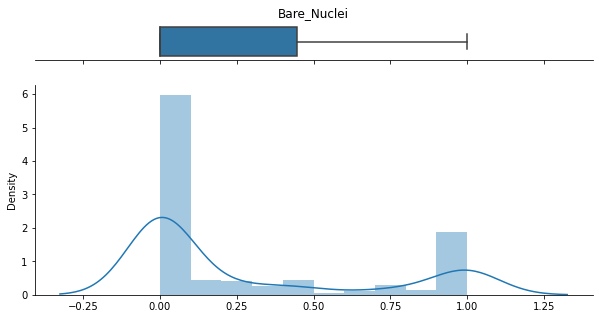

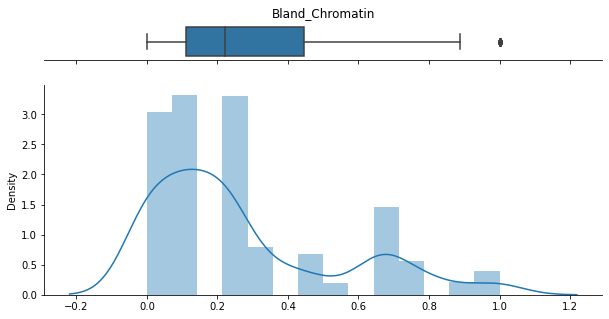

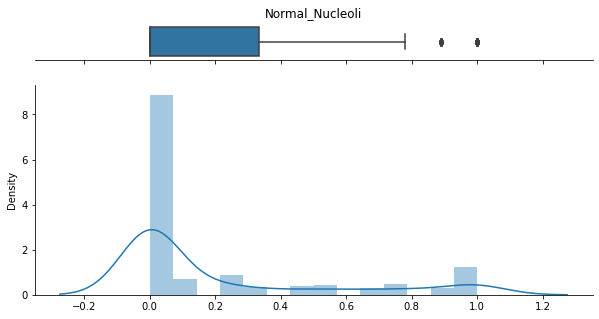

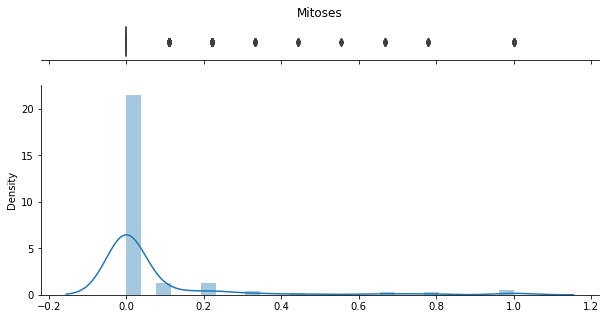

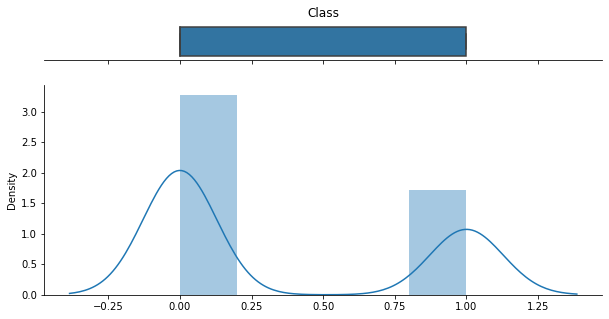

In [81]:
# Check for Outliers
for c in df_n.columns:
    fig, ax = plt.subplots(2, 
                           figsize = (10, 5),
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df_n[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(df_n[c], ax = ax_hist)
    ax_hist.set(xlabel = '')
    sns.despine(ax = ax_hist)

plt.show()

Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


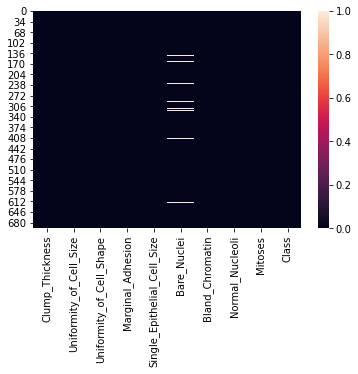

In [82]:
print(breast_cancer.isnull().sum())
sns.heatmap(breast_cancer.isnull())
plt.show()

In [84]:
# create X and y to match Scikit-Learn parlance

features = columns[1:-1] # discard the first and last columns
outcome = 'Class'

# X include all the features
X = df_n[features].copy()
# y is the target variable
y = df_n[outcome].copy()

In [85]:
X.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [86]:
X.shape

(699, 9)

In [87]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int8

In [88]:
y.value_counts()

0    458
1    241
Name: Class, dtype: int64

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [89]:
print('- What are the input variables (features)?')
print('  - %s' % ', '.join(features))
print('- Is there an output variable (label)?')
print('  - %s' % ('Yes' if outcome else 'No'))
print('- If there is an output variable:')
print('    - Which one is it?')
print('      - %s' % outcome)
print('    - What is its type?')
print('      - %s' % y.dtypes)
print('  - What type of Modelling is it?')
print('    - [%s] Supervised' % ('x' if outcome else ' '))
print('    - [%s] Unsupervised' % (' ' if outcome else 'x'))
print('  - What type of Modelling is it?')
print('    - [%s] Regression' % ('x' if (y.dtypes != 'object') & (len(y.unique()) >= 20) else ' '))
print('    - [%s] Classification (binary)' % ('x' if len(y.unique()) == 2 else ' '))
print('    - [%s] Classification (multi-class)' % ('x' if (y.dtypes == 'object') and (len(y.unique()) != 2) else ' '))
print('    - [%s] Clustering' % (' ' if outcome else 'x'))

- What are the input variables (features)?
  - Clump_Thickness, Uniformity_of_Cell_Size, Uniformity_of_Cell_Shape, Marginal_Adhesion, Single_Epithelial_Cell_Size, Bare_Nuclei, Bland_Chromatin, Normal_Nucleoli, Mitoses
- Is there an output variable (label)?
  - Yes
- If there is an output variable:
    - Which one is it?
      - Class
    - What is its type?
      - int8
  - What type of Modelling is it?
    - [x] Supervised
    - [ ] Unsupervised
  - What type of Modelling is it?
    - [ ] Regression
    - [x] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering


In [90]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)

In [91]:
param_grid = {
                "random_state": range(0,100)
             }
type(param_grid)


dict

In [92]:
search = HalvingGridSearchCV(
                             clf, param_grid,
                             cv = 5,
                             scoring='accuracy',
                             return_train_score=True,
                             n_jobs=-1,
                             random_state=0,
                             verbose=1
                            )
search.fit(X, y)

n_iterations: 4
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 20
max_resources_: 699
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 100
n_resources: 20
Fitting 5 folds for each of 100 candidates, totalling 500 fits
----------
iter: 1
n_candidates: 34
n_resources: 60
Fitting 5 folds for each of 34 candidates, totalling 170 fits
----------
iter: 2
n_candidates: 12
n_resources: 180
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 3
n_candidates: 4
n_resources: 540
Fitting 5 folds for each of 4 candidates, totalling 20 fits


HalvingGridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=1),
                    n_jobs=-1, param_grid={'random_state': range(0, 100)},
                    random_state=0,
                    refit=<function _refit_callable at 0x000002C31B4C7820>,
                    scoring='accuracy', verbose=1)

In [93]:
search.best_score_

0.9147455867082037

In [94]:
search.best_params_

{'random_state': 62}

In [95]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state=75)

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [96]:
## Create training and testing subsets
test_size = 0.3

# X = df.iloc[:,:-1] #omit the last column
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_size,
                                                    random_state = 100666001,
                                                    stratify = y)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

(i) Use Decision Tree as base classifier
(ii) Use AdaBoost for boosting

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [101]:
num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=%d)' % i for i in num_est]

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat = 2)

for n_est, label, grd in zip(num_est, label, grid):     
    boosting = AdaBoostClassifier(base_estimator = clf, n_estimators = n_est)   
    boosting.fit(X_train, y_train)
    print(boosting.score(X_test, y_test))
    #ax = plt.subplot(gs[grd[0], grd[1]])
    #fig = plot_decision_regions(X = X_train, y = y_train, clf = boosting, legend = 2)
    #plt.title(label)

#plt.show()

0.9142857142857143
0.9476190476190476
0.9523809523809523
0.9666666666666667


<Figure size 720x576 with 0 Axes>

In [105]:
kfold = KFold(n_splits = 10)
cart = DecisionTreeClassifier(splitter = 'random', max_depth = 1) 
# cart = DecisionTreeClassifier(max_depth = 1) 
cart.fit(X_train, y_train)
results = cross_val_score(cart, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 0.8957


In [107]:
seed = 7
num_trees = 35
kfold = KFold(n_splits = 10)
# model = AdaBoostClassifier(base_estimator = cart, n_estimators = num_trees, learning_rate = 0.7, random_state = seed)
model = AdaBoostClassifier(base_estimator = cart, n_estimators = num_trees, learning_rate = 0.8)
# if estimator not specified, therefore default is DecisionTreeClassifier initialized with max_depth=1
model.fit(X_train, y_train)
results = cross_val_score(model, X_train, y_train, cv = kfold)
print('AdaBoost, Cross-Validation mean: %.4f' % results.mean())

AdaBoost, Cross-Validation mean: 0.9530


In [108]:
model.score(X_test, y_test)

0.9619047619047619

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [109]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Decision Tree *
*****************
Accuracy : 0.9059 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9704 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9211                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


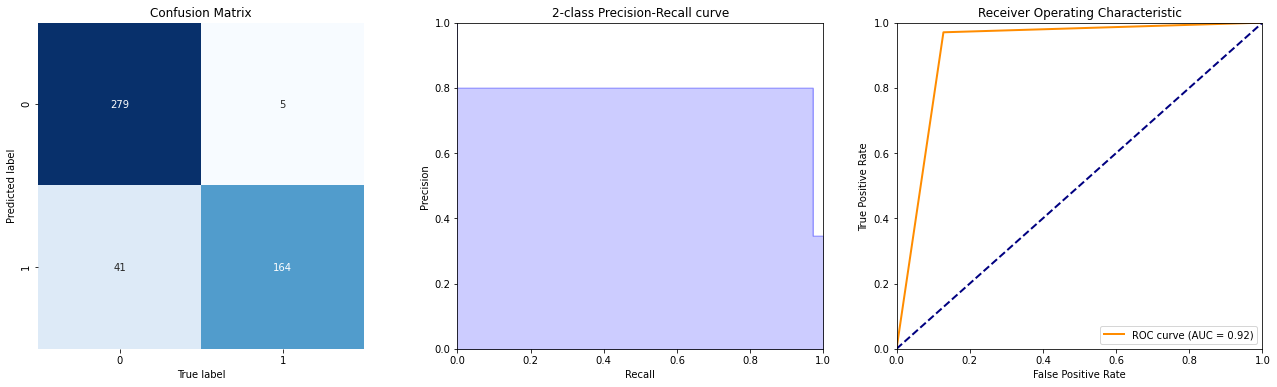


************
* AdaBoost *
************
Accuracy : 0.9796 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9704 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9704 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9774                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


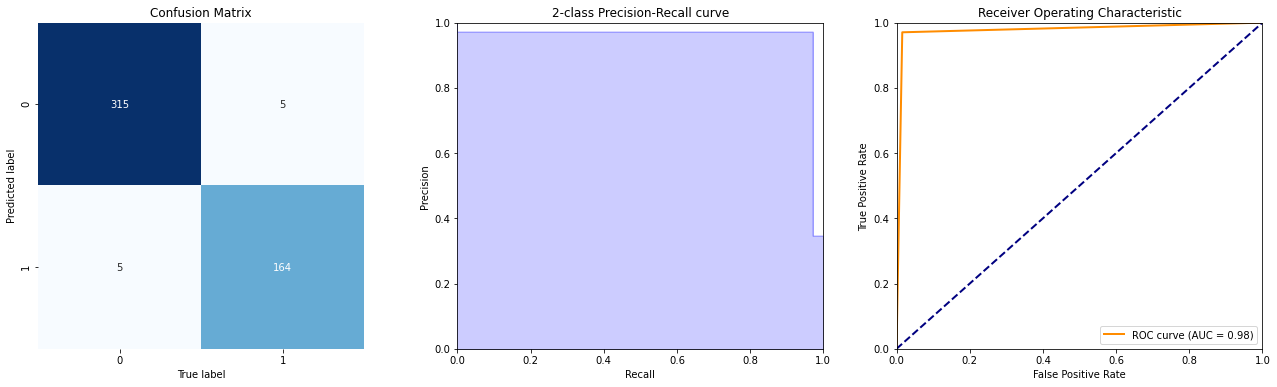

In [110]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'AdaBoost']
for i, m in enumerate([cart, model]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [111]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,0.90593,0.800000,0.970414,0.921145
1,AdaBoost,0.97955,0.970414,0.970414,0.977395


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [112]:
predictions = model.predict(X_test)

Accuracy : 0.9619 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9706 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9167 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9511                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


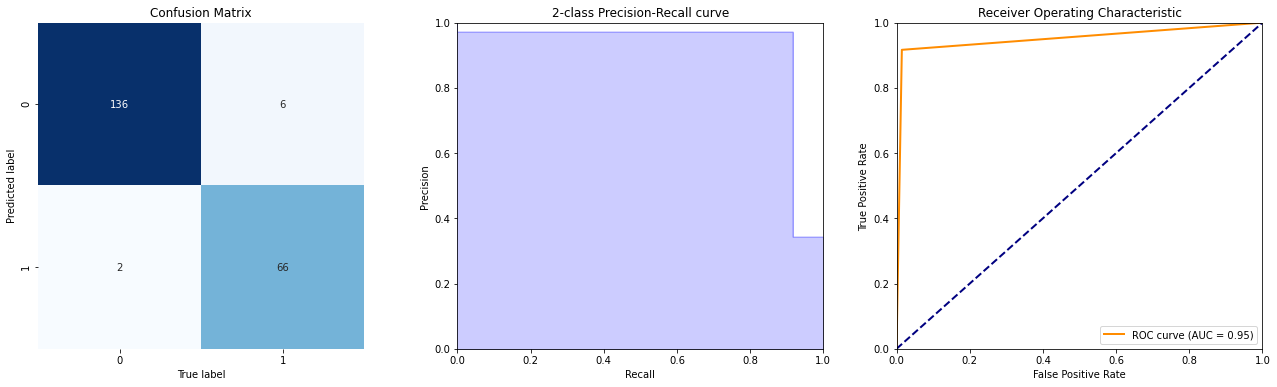

In [113]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
# keep the results
results.loc[len(results)] = {
    'Model': 'AdaBoost (with test)', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

In [114]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,0.905930,0.800000,0.970414,0.921145
1,AdaBoost,0.979550,0.970414,0.970414,0.977395
2,AdaBoost (with test),0.961905,0.970588,0.916667,0.951087


# Comparing

In [47]:
import itertools
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from time import time

from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

In [48]:
def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6

In [49]:
def benchmark(clf, adaboosting=False):
    
    print('_' * 80)
    print("Training: ")
        
    t0 = time()
    clf.fit(X_train, y_train)
    
    try:
        print("Gridsearch best estimator: ", clf.best_estimator_)         
    except:
        print("Classifier: ", clf)
        
    
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("Accuracy score for Testing set:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])



    print("classification report:")
    print(metrics.classification_report(y_test, pred,
                                        target_names=['False', 'True']))


    print("confusion matrix:")
    confusion_matrix = metrics.confusion_matrix(y_test, pred)
    #TN, FP, FN, TP = confusion_matrix.ravel()
    confusion_matrix_df = pd.DataFrame(confusion_matrix,
                                       columns=['predicted_false','predicted_true']).rename(index={0: 'is_fake', 1: 'is_real'})
    print(confusion_matrix_df)
    print('')
    print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
    
    plt.figure(figsize=[8,8])
    ax = plt.gca()
    try:
        plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8, name=str(clf.estimator).split('(')[0])
    except:
        plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8, name=str(clf).split('('))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    try:
        plt.title('Receiver operating characteristic for %s' %str(clf.estimator).split('(')[0], fontsize=18)
    except:
        plt.title('Receiver operating characteristic for %s' %str(clf).split('(')[0], fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
        
    if (adaboosting == True and str(clf).find('KNeighborsClassifier') == -1):
        print("\nAda boosting: ")
        # Ensemble Size
        num_est = np.linspace(1, 100, 20, dtype = np.int8)
        
        t0 = time()
        bg_clf_cv_mean = []
        bg_clf_cv_std = []
        for n_est in num_est:
            try:
                ada_clf = AdaBoostClassifier(base_estimator = clf.best_estimator_, n_estimators = n_est)
            except:
                ada_clf = AdaBoostClassifier(base_estimator = clf, n_estimators = n_est)
            
            
            scores = cross_val_score(ada_clf, X, y, cv = 5, scoring = 'accuracy')
            
            bg_clf_cv_mean.append(scores.mean())
            bg_clf_cv_std.append(scores.std())
        
        cv_time = time() - t0
        print("Cross validate time:  %0.3fs" % cv_time)

        # plot error bar
        plt.figure()
        (_, caps, _) = plt.errorbar(
            num_est,
            bg_clf_cv_mean,
            yerr = bg_clf_cv_std,
            c = 'blue',
            fmt = '-o',
            capsize = 5)

        for cap in caps:
            cap.set_markeredgewidth(1)

        plt.title('AdaBoost Ensemble')
        plt.ylabel('Accuracy')
        plt.xlabel('Ensemble Size')
        #plt.savefig('c23.png')
        plt.show()

        # plot learning curves
        try:
            boosting = AdaBoostClassifier(base_estimator = clf.best_estimator_, n_estimators = 10)
        except:
            boosting = AdaBoostClassifier(base_estimator = clf, n_estimators = 10)
        
        t0 = time()
        boosting.fit(X_train, y_train)
        training_time = time() - t0
        print("Training time:  %0.3fs" % training_time)
        
        boosting_score = boosting.score(X_train, y_train)
        print("Accuracy score(boosted) for Training set:   %0.3f" % boosting_score)
        boosting_score = boosting.score(X_test, y_test)
        print("Accuracy score(boosted) for Testing set:   %0.3f" % boosting_score)

        plt.figure()
        plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model = False, style = 'ggplot')
        plt.show()
        
        plt.figure(figsize=[8,8])
        ax = plt.gca()
        
        try:
            plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8, name=str(clf.estimator).split('(')[0])
        except:
            plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8, name=str(clf).split('('))
        
        plot_roc_curve(boosting, X_test, y_test, ax=ax, alpha=0.8 , name=str(boosting.base_estimator_).split('(')[0]+"(Boosted)")

        plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
        plt.xlim([-0.05, 1.0])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate', fontsize=18)
        plt.ylabel('True Positive Rate', fontsize=18)
        plt.title('Receiver operating characteristic for %s' %str(boosting.base_estimator_).split('(')[0]+"(Boosted)", fontsize=18)
        plt.legend(loc="lower right")
        plt.show()
        
        return clf, score, train_time, test_time, boosting, boosting_score


    
    print()
    #clf_descr = str(clf).split('(')[0]
    
    return clf, score, train_time, test_time

In [50]:
logres_params = {
    'random_state': np.arange(0,100)
}

svc_params = {
    'C': [1000],
    'random_state': np.arange(0,100)
}

knn_params = {
    'n_neighbors': [2]
}

dtc_params = {
    "random_state": range(0,100)
}

rfc_params = {
    'max_depth': [1],
    'random_state': np.arange(0,100)
}

In [51]:
def HalvingGridSearchCV_default(clf, clf_params):
    clf = HalvingGridSearchCV(clf,
                              clf_params,
                              scoring='accuracy',
                              return_train_score=True,
                              n_jobs=-1,
                              random_state=0,
                              verbose=0
                             )
    return clf

In [52]:
logres = LogisticRegression(max_iter=5000, n_jobs=-1)
logres_clf = HalvingGridSearchCV_default(logres, logres_params)

svc = svm.SVC(probability=True)
svc_clf = HalvingGridSearchCV_default(svc, svc_params)

knn = KNeighborsClassifier(n_jobs=-1)
knn_clf = HalvingGridSearchCV_default(knn, knn_params)

dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
dtc_clf = HalvingGridSearchCV_default(dtc, dtc_params)

rfc = RandomForestClassifier(criterion='entropy',n_jobs=-1)
rfc_clf = HalvingGridSearchCV_default(rfc, rfc_params)

Logistic Regression
________________________________________________________________________________
Training: 
Gridsearch best estimator:  LogisticRegression(max_iter=5000, n_jobs=-1, random_state=1)
train time: 1.952s
test time:  0.002s
Accuracy score for Testing set:   0.942
classification report:
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       133
        True       0.93      0.91      0.92        75

    accuracy                           0.94       208
   macro avg       0.94      0.93      0.94       208
weighted avg       0.94      0.94      0.94       208

confusion matrix:
         predicted_false  predicted_true
is_fake              128               5
is_real                7              68

[['TN' 'FP']
 ['FN' 'TP']]


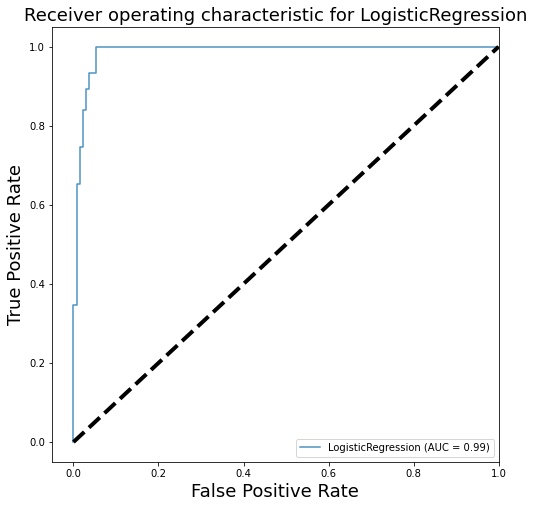


Ada boosting: 
Cross validate time:  20.745s


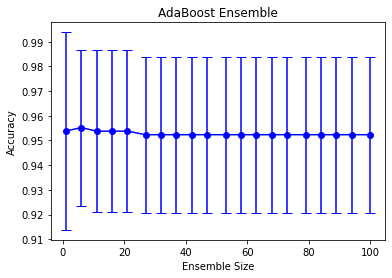

Training time:  0.062s
Accuracy score(boosted) for Training set:   0.979
Accuracy score(boosted) for Testing set:   0.942


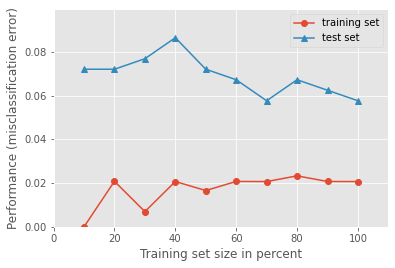

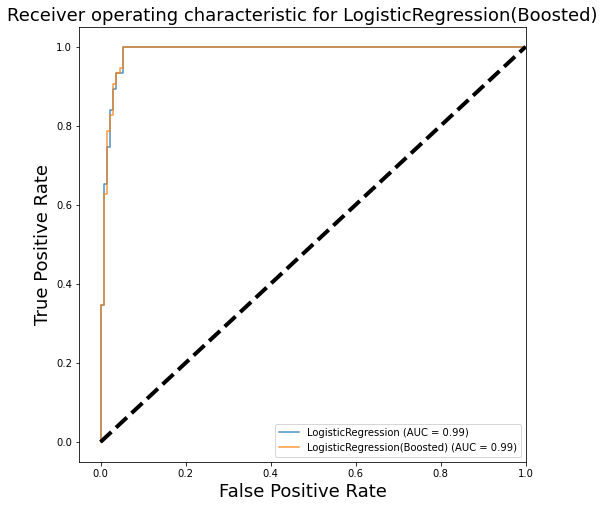

SVM
________________________________________________________________________________
Training: 
Gridsearch best estimator:  SVC(C=1000, probability=True, random_state=1)
train time: 0.989s
test time:  0.002s
Accuracy score for Testing set:   0.938
classification report:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       133
        True       0.94      0.88      0.91        75

    accuracy                           0.94       208
   macro avg       0.94      0.92      0.93       208
weighted avg       0.94      0.94      0.94       208

confusion matrix:
         predicted_false  predicted_true
is_fake              129               4
is_real                9              66

[['TN' 'FP']
 ['FN' 'TP']]


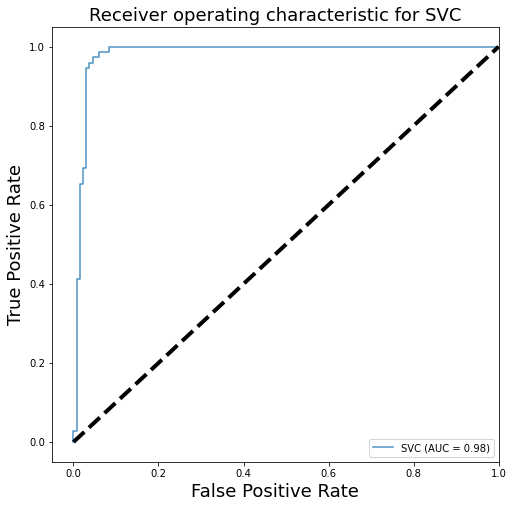


Ada boosting: 
Cross validate time:  14.545s


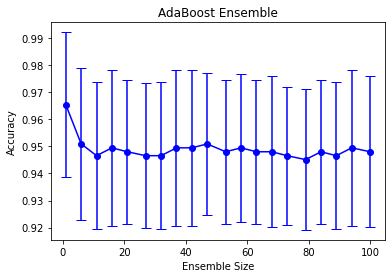

Training time:  0.052s
Accuracy score(boosted) for Training set:   1.000
Accuracy score(boosted) for Testing set:   0.952


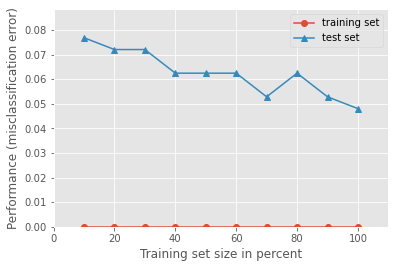

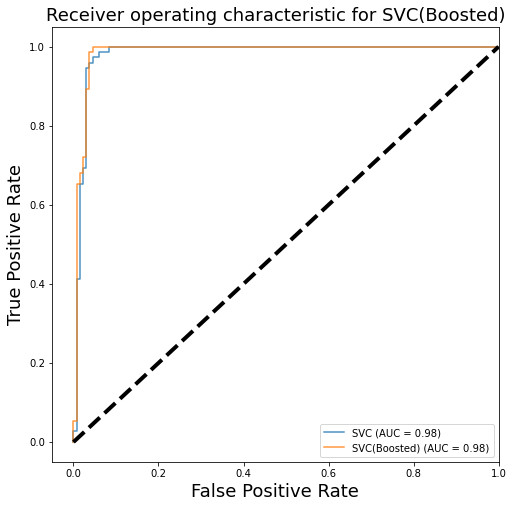

KNN
________________________________________________________________________________
Training: 
Gridsearch best estimator:  KNeighborsClassifier(n_jobs=-1, n_neighbors=2)
train time: 0.046s
test time:  0.011s
Accuracy score for Testing set:   0.933
classification report:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       133
        True       0.96      0.85      0.90        75

    accuracy                           0.93       208
   macro avg       0.94      0.92      0.93       208
weighted avg       0.93      0.93      0.93       208

confusion matrix:
         predicted_false  predicted_true
is_fake              130               3
is_real               11              64

[['TN' 'FP']
 ['FN' 'TP']]


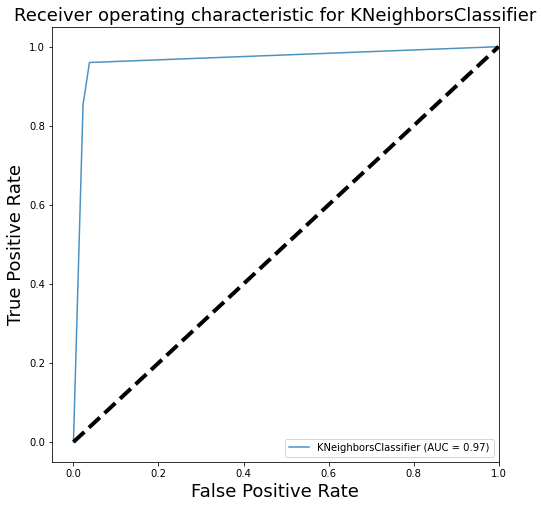


Decision Tree
________________________________________________________________________________
Training: 
Gridsearch best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
train time: 0.936s
test time:  0.001s
Accuracy score for Testing set:   0.870
classification report:
              precision    recall  f1-score   support

       False       0.96      0.83      0.89       133
        True       0.76      0.93      0.84        75

    accuracy                           0.87       208
   macro avg       0.86      0.88      0.86       208
weighted avg       0.89      0.87      0.87       208

confusion matrix:
         predicted_false  predicted_true
is_fake              111              22
is_real                5              70

[['TN' 'FP']
 ['FN' 'TP']]


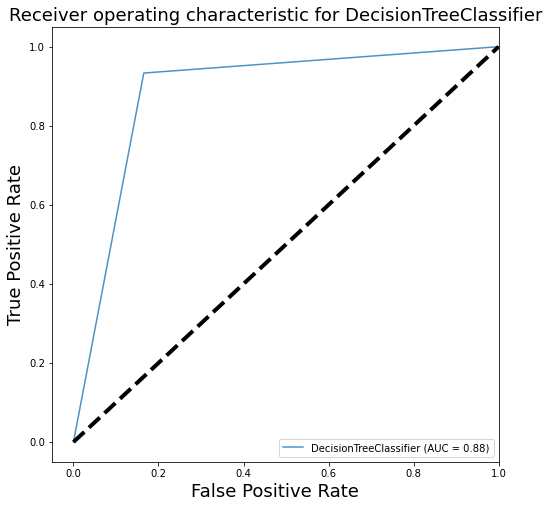


Ada boosting: 
Cross validate time:  5.459s


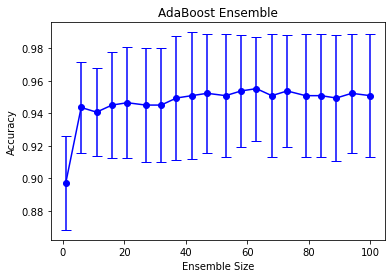

Training time:  0.011s
Accuracy score(boosted) for Training set:   0.979
Accuracy score(boosted) for Testing set:   0.942


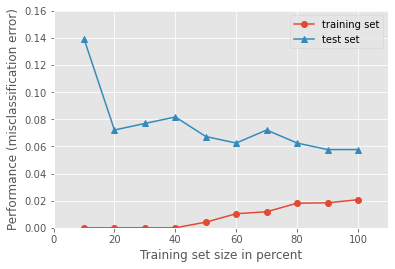

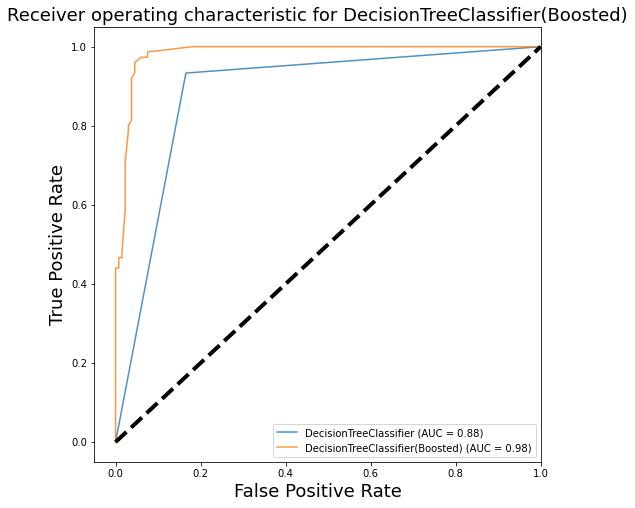

Random Forest
________________________________________________________________________________
Training: 
Gridsearch best estimator:  RandomForestClassifier(criterion='entropy', max_depth=1, n_jobs=-1,
                       random_state=7)
train time: 17.316s
test time:  0.016s
Accuracy score for Testing set:   0.952
classification report:
              precision    recall  f1-score   support

       False       0.97      0.95      0.96       133
        True       0.92      0.95      0.93        75

    accuracy                           0.95       208
   macro avg       0.95      0.95      0.95       208
weighted avg       0.95      0.95      0.95       208

confusion matrix:
         predicted_false  predicted_true
is_fake              127               6
is_real                4              71

[['TN' 'FP']
 ['FN' 'TP']]


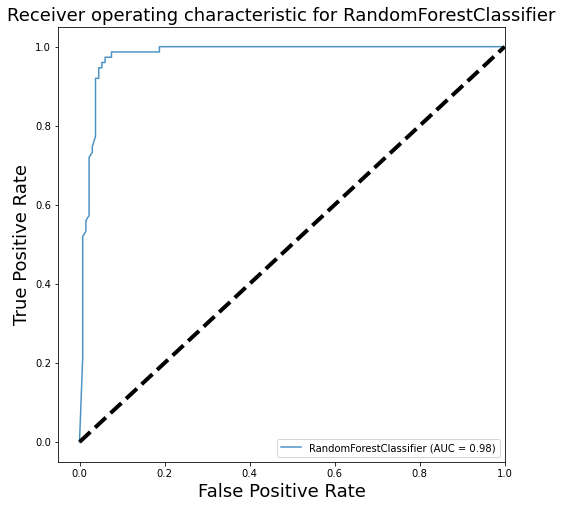


Ada boosting: 
Cross validate time:  597.773s


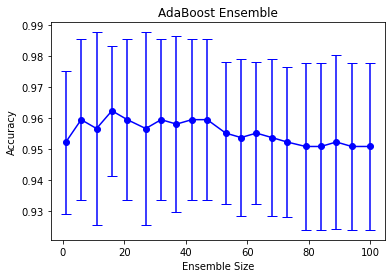

Training time:  1.171s
Accuracy score(boosted) for Training set:   0.975
Accuracy score(boosted) for Testing set:   0.947


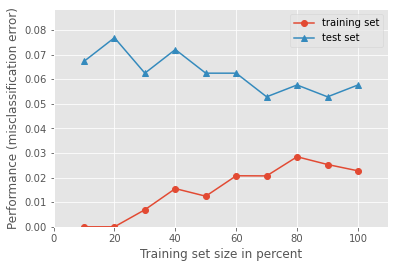

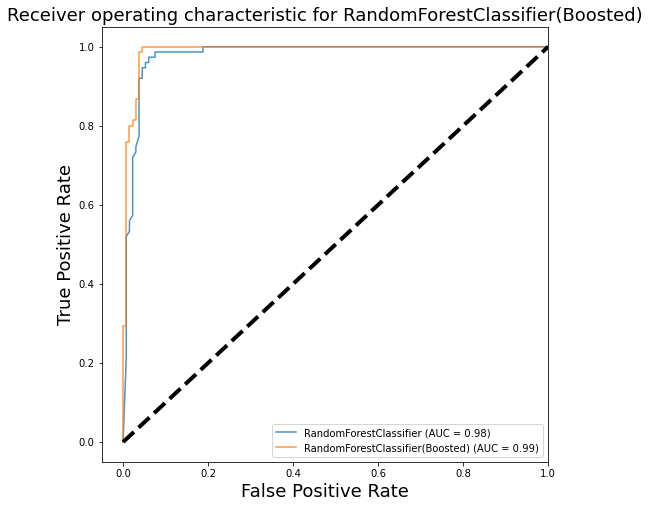

In [53]:
results_optimal = []
clf_names = []
for clf, name in ((logres_clf, "Logistic Regression"),
                  (svc_clf, "SVM"),
                  (knn_clf, "KNN"),
                  (dtc_clf, "Decision Tree"),
                  (rfc_clf, "Random Forest")):
    print('=' * 80)
    print(name)
    clf_names.append(name)
    results_optimal.append(benchmark(clf, adaboosting=True))
    
result_df = pd.DataFrame(results_optimal,
                         index=clf_names,
                         columns=['clf', 'score', 'train_time', 'test_time', 'boosting', 'boosting_score']
                        )


In [54]:
result_df

,clf,score,train_time,test_time,boosting,boosting_score
Logistic Regression,HalvingGridSearchCV(estimator=LogisticRegressi...,0.942308,1.952365,0.001952,"(LogisticRegression(max_iter=5000, n_jobs=-1, ...",0.942308
SVM,HalvingGridSearchCV(estimator=SVC(probability=...,0.937500,0.989233,0.001952,"(SVC(C=1000, probability=True, random_state=18...",0.951923
KNN,HalvingGridSearchCV(estimator=KNeighborsClassi...,0.932692,0.045871,0.010736,None,NaN
Decision Tree,HalvingGridSearchCV(estimator=DecisionTreeClas...,0.870192,0.935591,0.000976,"(DecisionTreeClassifier(criterion='entropy', m...",0.942308
Random Forest,HalvingGridSearchCV(estimator=RandomForestClas...,0.951923,17.315845,0.015615,"((DecisionTreeClassifier(criterion='entropy', ...",0.947115


In [55]:
result_df.boosting[1].score(X_test,y_test)

0.9519230769230769

In [61]:
result_df.boosting[3]

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1,
                                                         random_state=1),
                   n_estimators=10)

Logistic Regression
________________________________________________________________________________
Training: 
Classifier:  LogisticRegression(max_iter=5000, n_jobs=-1)
train time: 0.009s
test time:  0.002s
Accuracy score for Testing set:   0.942
dimensionality: 9
classification report:
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       133
        True       0.93      0.91      0.92        75

    accuracy                           0.94       208
   macro avg       0.94      0.93      0.94       208
weighted avg       0.94      0.94      0.94       208

confusion matrix:
         predicted_false  predicted_true
is_fake              128               5
is_real                7              68

[['TN' 'FP']
 ['FN' 'TP']]


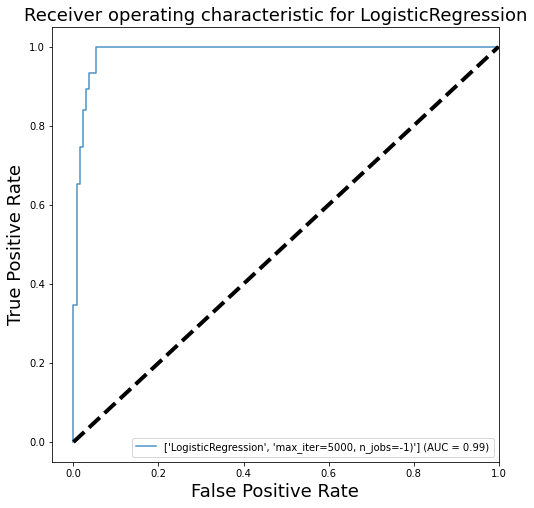


SVM
________________________________________________________________________________
Training: 
Classifier:  SVC(probability=True)
train time: 0.010s
test time:  0.002s
Accuracy score for Testing set:   0.962
classification report:
              precision    recall  f1-score   support

       False       0.98      0.96      0.97       133
        True       0.94      0.96      0.95        75

    accuracy                           0.96       208
   macro avg       0.96      0.96      0.96       208
weighted avg       0.96      0.96      0.96       208

confusion matrix:
         predicted_false  predicted_true
is_fake              128               5
is_real                3              72

[['TN' 'FP']
 ['FN' 'TP']]


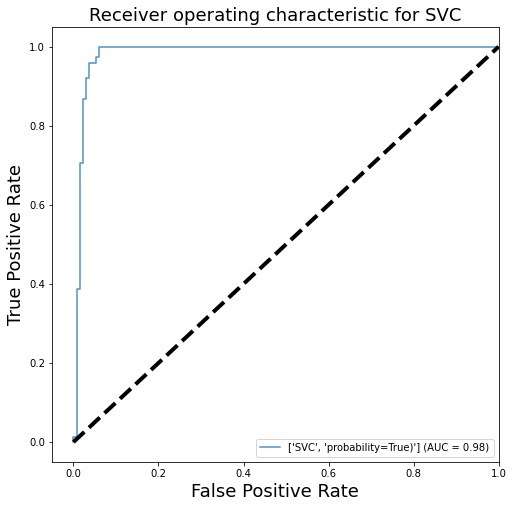


KNN
________________________________________________________________________________
Training: 
Classifier:  KNeighborsClassifier(n_jobs=-1, n_neighbors=2)
train time: 0.002s
test time:  0.010s
Accuracy score for Testing set:   0.933
classification report:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       133
        True       0.96      0.85      0.90        75

    accuracy                           0.93       208
   macro avg       0.94      0.92      0.93       208
weighted avg       0.93      0.93      0.93       208

confusion matrix:
         predicted_false  predicted_true
is_fake              130               3
is_real               11              64

[['TN' 'FP']
 ['FN' 'TP']]


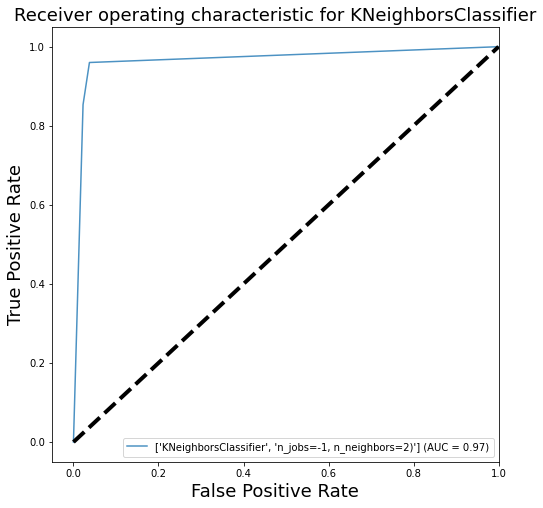


Random Forest
________________________________________________________________________________
Training: 
Classifier:  RandomForestClassifier(criterion='entropy', max_depth=1, n_jobs=-1)
train time: 0.102s
test time:  0.015s
Accuracy score for Testing set:   0.957
classification report:
              precision    recall  f1-score   support

       False       0.98      0.95      0.97       133
        True       0.92      0.96      0.94        75

    accuracy                           0.96       208
   macro avg       0.95      0.96      0.95       208
weighted avg       0.96      0.96      0.96       208

confusion matrix:
         predicted_false  predicted_true
is_fake              127               6
is_real                3              72

[['TN' 'FP']
 ['FN' 'TP']]


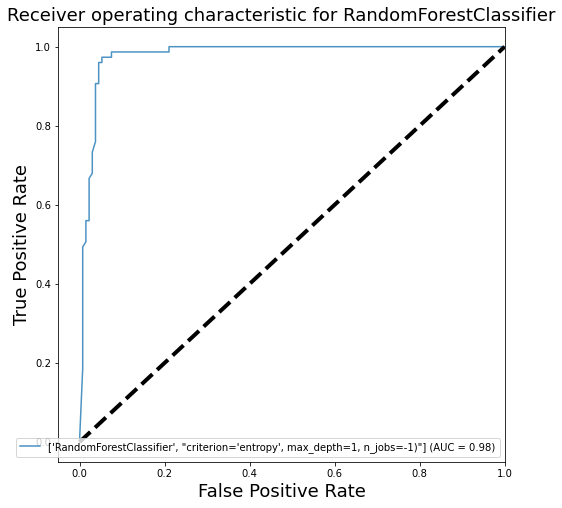

In [56]:
results_base = []
for clf, name in (
        (LogisticRegression(max_iter=5000, n_jobs=-1), "Logistic Regression"),
        (svm.SVC(probability=True), "SVM"),
        (KNeighborsClassifier(n_jobs=-1, n_neighbors=2), "KNN"),
        (RandomForestClassifier(criterion='entropy',n_jobs=-1,max_depth=1), "Random Forest")):
    print('=' * 80)
    print(name)
    results_base.append(benchmark(clf))

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [116]:
r = breast_cancer.iloc[pd.DataFrame(X_test).index[0]]
for i, c in enumerate(breast_cancer.columns[:-1]):
    print('%-27s: %d' % (c, int(r[i])))
print('%-27s: %s' % (breast_cancer.columns[-1], 'Benign' if r[-1] == 2 else 'Malignant'))
print('%-27s: %s' % ('Prediction', 'Benign' if predictions[0] == 0 else 'Malignant'))

Clump_Thickness            : 3
Uniformity_of_Cell_Size    : 1
Uniformity_of_Cell_Shape   : 1
Marginal_Adhesion          : 1
Single_Epithelial_Cell_Size: 1
Bare_Nuclei                : 1
Bland_Chromatin            : 2
Normal_Nucleoli            : 1
Mitoses                    : 1
Class                      : Benign
Prediction                 : Benign


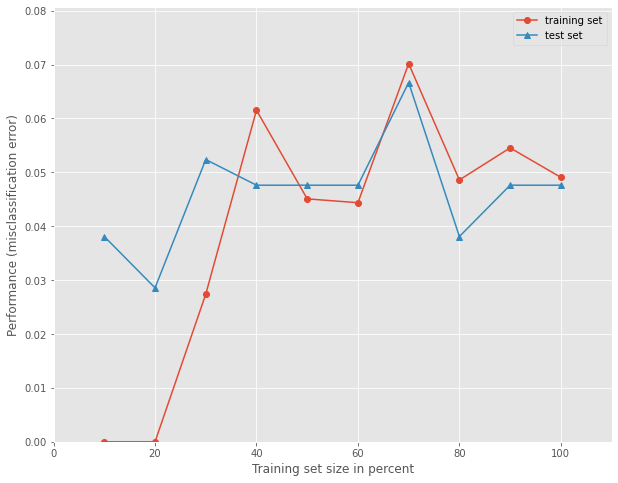

In [117]:
from mlxtend.plotting import plot_learning_curves

boosting = AdaBoostClassifier(n_estimators = num_trees, learning_rate = 0.01, random_state = seed)
        
plt.figure(figsize=(10, 8))
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model = False, style = 'ggplot')
plt.show()

In [118]:
learn_rate = np.linspace(0.01, 1, 21)

In [119]:
learn_rate

array([0.01  , 0.0595, 0.109 , 0.1585, 0.208 , 0.2575, 0.307 , 0.3565,
       0.406 , 0.4555, 0.505 , 0.5545, 0.604 , 0.6535, 0.703 , 0.7525,
       0.802 , 0.8515, 0.901 , 0.9505, 1.    ])

In [120]:
# Learning Rate

np.random.seed(7)

bg_clf_cv_mean = []
bg_clf_cv_std = []

for l_rate in learn_rate:
    ada_clf = AdaBoostClassifier(n_estimators = num_trees, learning_rate = l_rate, random_state = seed)
    scores = cross_val_score(ada_clf, X_train, y_train, cv = 3, scoring = 'accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

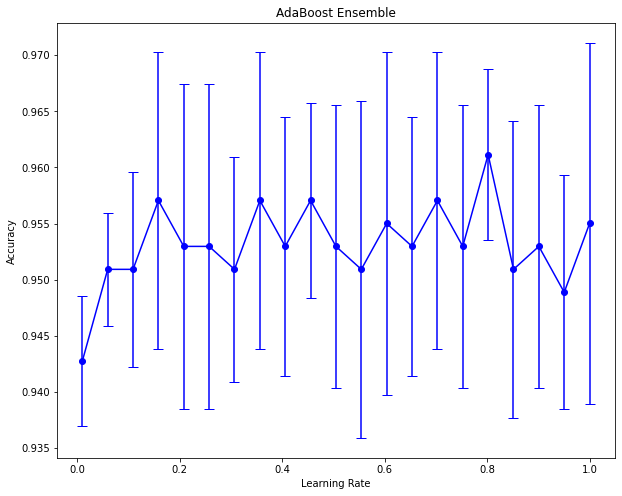

In [121]:
plt.figure(figsize=(10,8))

(_, caps, _) = plt.errorbar(
    learn_rate,
    bg_clf_cv_mean,
    yerr = bg_clf_cv_std,
    c = 'blue',
    fmt = '-o',
    capsize = 5)

for cap in caps:
    cap.set_markeredgewidth(1)
plt.title('AdaBoost Ensemble')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.show()

In [122]:
# Feature importances

height = pd.DataFrame(model.feature_importances_)

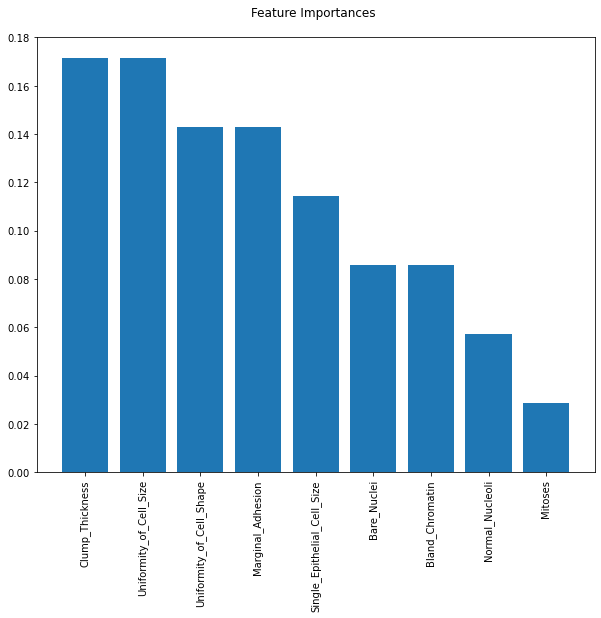

In [123]:
y_pos = range(len(X.columns))

plt.figure(figsize=(10,8))
plt.bar(X.columns, height[0].sort_values(ascending=False))
plt.xticks(y_pos, X.columns, rotation=90)
plt.title('Feature Importances \n')
plt.show()

In [124]:
# Lift curve

def plot_Lift_curve(y_test, predictions, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_test
    aux_lift['predicted'] = predictions
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (10,10)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()



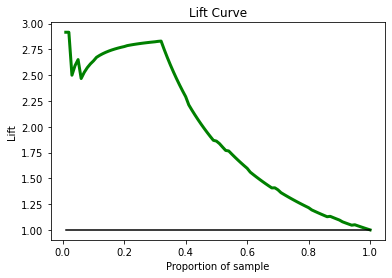

In [125]:
plot_Lift_curve(y_test, predictions)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



